In [1]:
from keras.models import Sequential
"""Import from keras_preprocessing not from keras.preprocessing, 
because Keras may or maynot contain the features discussed here depending upon when you read this article, 
until the keras_preprocessed library is updated in Keras use the github version."""
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
import json
from sklearn.utils import shuffle
#https://medium.com/@vijayabhaskar96/multi-label-image-classification-tutorial-with-keras-imagedatagenerator-cd541f8eaf24

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/histo_keras/data_chec_resized/dat.csv',sep=',')
df["label"]=df["label"].apply(lambda x:x.split(","))
df["label"]

0          [SI]
1          [SI]
2          [SI]
3          [SI]
4          [SI]
5          [SI]
6          [SI]
7          [SI]
8          [SI]
9          [SI]
10         [SI]
11       [Skin]
12       [Skin]
13       [Skin]
14       [Skin]
15       [Skin]
16       [Skin]
17       [Skin]
18       [Skin]
19     [Kidney]
20     [Kidney]
21     [Kidney]
22     [Kidney]
23     [Kidney]
24     [Kidney]
25     [Kidney]
26     [Kidney]
27     [Kidney]
28     [Kidney]
29    [Bladder]
        ...    
50       [Lung]
51      [Brain]
52      [Brain]
53      [Brain]
54      [Brain]
55      [Brain]
56      [Brain]
57      [Brain]
58      [Brain]
59      [Brain]
60      [Brain]
61      [Liver]
62      [Liver]
63      [Liver]
64      [Liver]
65      [Liver]
66      [Liver]
67      [Liver]
68      [Liver]
69      [Liver]
70      [Liver]
71         [LI]
72         [LI]
73         [LI]
74         [LI]
75         [LI]
76         [LI]
77         [LI]
78         [LI]
79         [LI]
Name: label, Length: 80,

In [0]:
%cd /content/gdrive/My\ Drive/histo_keras/data_chec_resized
%mv 'dat (1).csv' 'dat.csv'
%ls

/content/gdrive/My Drive/histo_keras/data_chec_resized
mv: cannot stat 'dat (1).csv': No such file or directory
 Bladder/   dat.csv   LI/      Lung/   SI/    'Sk muscle'/
 Brain/     Kidney/   Liver/   pool/   Skin/   Stomach/


In [0]:
# Shuffle df to get a mix of all classes
df = shuffle(df)

In [0]:
# Create pool directory of all resized images
%cd pool
%ls

/content/gdrive/My Drive/histo_keras/data_chec_resized/pool
'Cerebrum 10.jpg'  'Kidney 6.jpg'  'Liver 3.jpg'  'Lung 8.jpg'  'Skin 4.jpg'
'Cerebrum 1.jpg'   'Kidney 7.jpg'  'Liver 4.jpg'  'Lung 9.jpg'  'Skin 5.jpg'
'Cerebrum 2.jpg'   'Kidney 8.jpg'  'Liver 5.jpg'   SI10.jpg     'Skin 7.jpg'
'Cerebrum 3.jpg'   'Kidney 9.jpg'  'Liver 6.jpg'   SI11.jpg     'Skin 8.jpg'
'Cerebrum 4.jpg'    LI11.jpg       'Liver 7.jpg'   SI1.jpg      'Skin 9.jpg'
'Cerebrum 5.jpg'    LI1.jpg        'Liver 8.jpg'   SI2.jpg      'TE 10.jpg'
'Cerebrum 6.jpg'    LI2.jpg        'Liver 9.jpg'   SI3.jpg      'TE 11.jpg'
'Cerebrum 7.jpg'    LI3.jpg        'Lung 10.jpg'   SI4.jpg      'TE 1.jpg'
'Cerebrum 8.jpg'    LI4.jpg        'Lung 11.jpg'   SI5.jpg      'TE 2.jpg'
'Cerebrum 9.jpg'    LI5.jpg        'Lung 1.jpg'    SI6.jpg      'TE 3.jpg'
'Kidney 10.jpg'     LI6.jpg        'Lung 2.jpg'    SI7.jpg      'TE 4.jpg'
'Kidney 1.jpg'      LI7.jpg        'Lung 3.jpg'    SI8.jpg      'TE 5.jpg'
'Kidney 2.jpg'      LI8.jpg 

In [0]:
df[0:49]

,filename,label
35,TE 6.jpg,[Bladder]
68,Liver 10.jpg,[Liver]
56,Cerebrum 6.jpg,[Brain]
13,Skin 2.jpg,[Skin]
14,Skin 1.jpg,[Skin]
3,SI4.jpg,[SI]
19,Kidney 8.jpg,[Kidney]
4,SI6.jpg,[SI]
59,Cerebrum 8.jpg,[Brain]
28,Kidney 6.jpg,[Kidney]


In [0]:
classes=["Bladder","LI","Lung","Skin","Stomach","Brain","Kidney","Liver","SI","Sk muscle"]

datagen=ImageDataGenerator(rescale=1./255.)

test_datagen=ImageDataGenerator(rescale=1./255.)

train_generator=datagen.flow_from_dataframe(
    dataframe=df[0:54],
    directory="/content/gdrive/My Drive/histo_keras/data_chec_resized/pool",
    x_col="filename",
    y_col="label",
    batch_size=8,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    classes = classes,
    target_size=(256,192))
valid_generator=test_datagen.flow_from_dataframe(
    dataframe=df[55:69],
    directory="/content/gdrive/My Drive/histo_keras/data_chec_resized/pool",
    x_col="filename",
    y_col="label",
    batch_size=4,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    classes = classes,
    target_size=(256,192))
test_generator=test_datagen.flow_from_dataframe(
    dataframe=df[70:79],
    directory="/content/gdrive/My Drive/histo_keras/data_chec_resized/pool",
    x_col="filename",
    batch_size=1,
    seed=42,
    shuffle=False,
    class_mode=None,
    classes = classes,
    target_size=(256,192))

Found 54 images belonging to 10 classes.
Found 14 images belonging to 10 classes.
Found 9 images.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:194: UserWarning: `classes` will be ignored given the class_mode="None"
  .format(self.class_mode))


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(256,192,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='sigmoid'))
model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])


In [0]:
model_json = model.to_json()
with open("model_1.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
valid_generator.n//valid_generator.batch_size

4

In [0]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
h = model.fit_generator(generator=train_generator,
                    steps_per_epoch=2,
                    validation_data=valid_generator,
                    validation_steps=2,
                    epochs=10)

Epoch 1/10
2/2 [==============================] - 7s 4s/step - loss: 0.2869 - acc: 0.8875 - val_loss: 0.3035 - val_acc: 0.9250
Epoch 2/10
2/2 [==============================] - 7s 4s/step - loss: 0.3217 - acc: 0.8875 - val_loss: 0.3806 - val_acc: 0.8667
Epoch 3/10
2/2 [==============================] - 7s 4s/step - loss: 0.2511 - acc: 0.9062 - val_loss: 0.3263 - val_acc: 0.9000
Epoch 4/10
2/2 [==============================] - 7s 3s/step - loss: 0.2772 - acc: 0.9079 - val_loss: 0.3601 - val_acc: 0.8833
Epoch 5/10
2/2 [==============================] - 7s 4s/step - loss: 0.2551 - acc: 0.9062 - val_loss: 0.3335 - val_acc: 0.8750
Epoch 6/10
2/2 [==============================] - 7s 4s/step - loss: 0.2287 - acc: 0.9125 - val_loss: 0.3156 - val_acc: 0.9000
Epoch 7/10
2/2 [==============================] - 7s 3s/step - loss: 0.2614 - acc: 0.8986 - val_loss: 0.3186 - val_acc: 0.9000
Epoch 8/10
2/2 [==============================] - 7s 4s/step - loss: 0.2123 - acc: 0.9250 - val_loss: 0.2883 - 

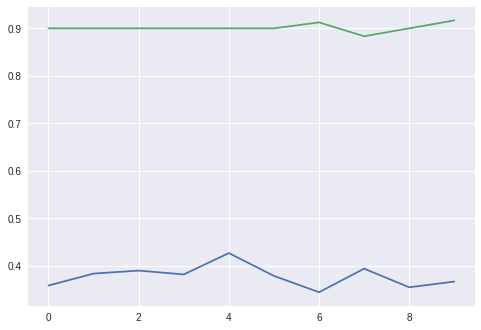

In [0]:
import matplotlib.pyplot as plt
plt.plot(h.history['val_loss'])
plt.plot(h.history['val_acc'])

In [0]:
model.save_weights("w_1.h5")

In [0]:
json.dump(h.history, open('h_1.json', 'w'))

In [0]:
train_generator.reset()
pred=model.predict_generator(train_generator,
steps=STEP_SIZE_TRAIN,
verbose=1)
print(len(train_generator.filenames))
print(len(pred))

6/6 [==============================] - 4s 682ms/step
50
48


In [0]:
STEP_SIZE_TRAIN

6

In [0]:
len(pred)

8

In [0]:
pred_bool = (pred >0.3)
pred_bool

In [0]:
predictions=[]
labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
for row in pred_bool:
    l=[]
    for index,cls in enumerate(row):
        if cls:
            l.append(labels[index])
    predictions.append(",".join(l))
print(len(predictions))
print(len(filenames))
filenames=train_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results

48
49


ValueError: ignored

In [0]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

In [0]:
pred_bool = (pred >0.3)

In [0]:
pred

array([[0.21300298, 0.25221795, 0.1883299 , 0.25052795, 0.28294885,
        0.17389861, 0.2355597 , 0.11874866, 0.22519344, 0.09623055],
       [0.25296164, 0.23950213, 0.21300906, 0.26180708, 0.283927  ,
        0.23832089, 0.24021164, 0.13991082, 0.25280252, 0.11501409],
       [0.29975235, 0.30226117, 0.28438938, 0.3147922 , 0.34228578,
        0.2658707 , 0.3035639 , 0.20041144, 0.3063392 , 0.17479949],
       [0.30443394, 0.24770838, 0.27482033, 0.28517717, 0.30874068,
        0.28710985, 0.25760663, 0.17243621, 0.29452637, 0.14248882],
       [0.24842519, 0.26019832, 0.21836728, 0.25632247, 0.2954532 ,
        0.19258937, 0.24774238, 0.13580137, 0.24572444, 0.11332206],
       [0.35322684, 0.30802017, 0.3220808 , 0.33297163, 0.35574287,
        0.3279066 , 0.32031024, 0.2356334 , 0.341174  , 0.20855281],
       [0.24696398, 0.29778862, 0.20708415, 0.28336978, 0.30873653,
        0.20762312, 0.26310876, 0.15244195, 0.25349975, 0.1330829 ],
       [0.24613416, 0.28452355, 0.2170230

In [0]:
predictions=[]
labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
for row in pred_bool:
    l=[]
    for index,cls in enumerate(row):
        if cls:
            l.append(labels[index])
    predictions.append(",".join(l))
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results

,Filename,Predictions
0,LI4.jpg,
1,Lung 5.jpg,
2,TE 4.jpg,"Brain,LI,Liver,SI,Skin"
3,Lung 9.jpg,"Bladder,Liver"
4,LI1.jpg,
5,TE 10.jpg,"Bladder,Brain,Kidney,LI,Liver,Lung,SI,Skin"
6,Cerebrum 3.jpg,Liver
7,Liver 3.jpg,Liver
8,Cerebrum 4.jpg,Liver
